<a href="https://colab.research.google.com/github/shivamshukla-exe/foreign_direct_investment/blob/main/Foreign_direct_investment_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
FDI = pd.read_csv('/content/FDI data.csv')
FDI.head(3)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98


In [ ]:
FDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [ ]:
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors = ['Sector']
Rates = [45.68,47.69,48.4,45.95,44.93,44.27,45.24,40.26,46,47.44,45.56,48,54.41,60.50,61.14,65.46,67.1]
def multiply_columns(df, col_list, num):
    for col in col_list:
        df[col] = df[col] * Rates[col_list.index(col)]/10
    return df
FDI_InUSD=FDI.copy()
FDI_02 = multiply_columns(FDI, Year, Rates)
#FDI INFLOWS (Amount in ₹ Crores)
FDI_02.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,103.64792,67.43366,177.1924,37.26545,900.30734,660.19851,768.80856,4733.56950,4415.724,1991.91072,5003.12584,8573.472,7977.75743,3434.1615,2197.00476,2987.00526,9663.6078
1,MINING,6.02976,31.09388,48.6904,107.89060,44.57056,32.75980,29.94888,1788.99336,157.136,827.35360,362.24756,684.720,314.97949,77.0165,4184.36046,3408.30582,374.0825
2,POWER,408.47056,3612.23136,286.0924,124.47855,194.86141,321.79863,710.94660,3980.42568,4175.236,6033.37176,5794.18412,7931.424,2914.63488,6449.7840,4322.84256,5687.16480,7468.0958
3,NON-CONVENTIONAL ENERGY,0.00000,0.00000,8.2280,19.02330,5.70611,5.97645,11.03856,236.80932,579.048,2953.23488,976.80640,2170.416,6020.57532,2506.2125,3765.91830,5083.03446,5257.7547
4,COAL PRODUCTION,0.00000,0.00000,0.0000,0.18380,0.00000,40.46278,5.88120,56.68608,1.012,0.00000,0.00000,0.000,0.00000,17.9080,0.00000,0.00000,0.0000


In [ ]:
#Sector-wise Total FDI 2000-2017
melt = pd.melt(FDI_InUSD, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(US$ Million)',ignore_index=True)
melt01 = pd.melt(FDI_02, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(₹ Crores)',ignore_index=True)
melt01=round(melt01,2)
Merged=melt01.merge(melt,how='left')
Sorted = Merged.sort_values(['Sector','Year'], ignore_index=True)
Sorted = Sorted[['Sector','FDI(₹ Crores)', 'FDI(US$ Million)'
                 ,]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects"
                              ,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)"
                              ,'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)']
                             ,["CONSTRUCTION DEVELOPMENT","SERVICES SECTOR",'TEA AND COFFEE'])
Sectorwise_fdi = Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by='FDI(US$ Million)',ascending=False)

,FDI(₹ Crores),FDI(US$ Million)
Sector,,
SERVICES SECTOR,316426.67,59476.49
COMPUTER SOFTWARE & HARDWARE,137296.48,24669.49
CONSTRUCTION DEVELOPMENT,115217.43,24293.09
TELECOMMUNICATIONS,131001.76,23946.01
AUTOMOBILE INDUSTRY,92637.98,16673.92
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28
COAL PRODUCTION,122.13,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.62,7.98


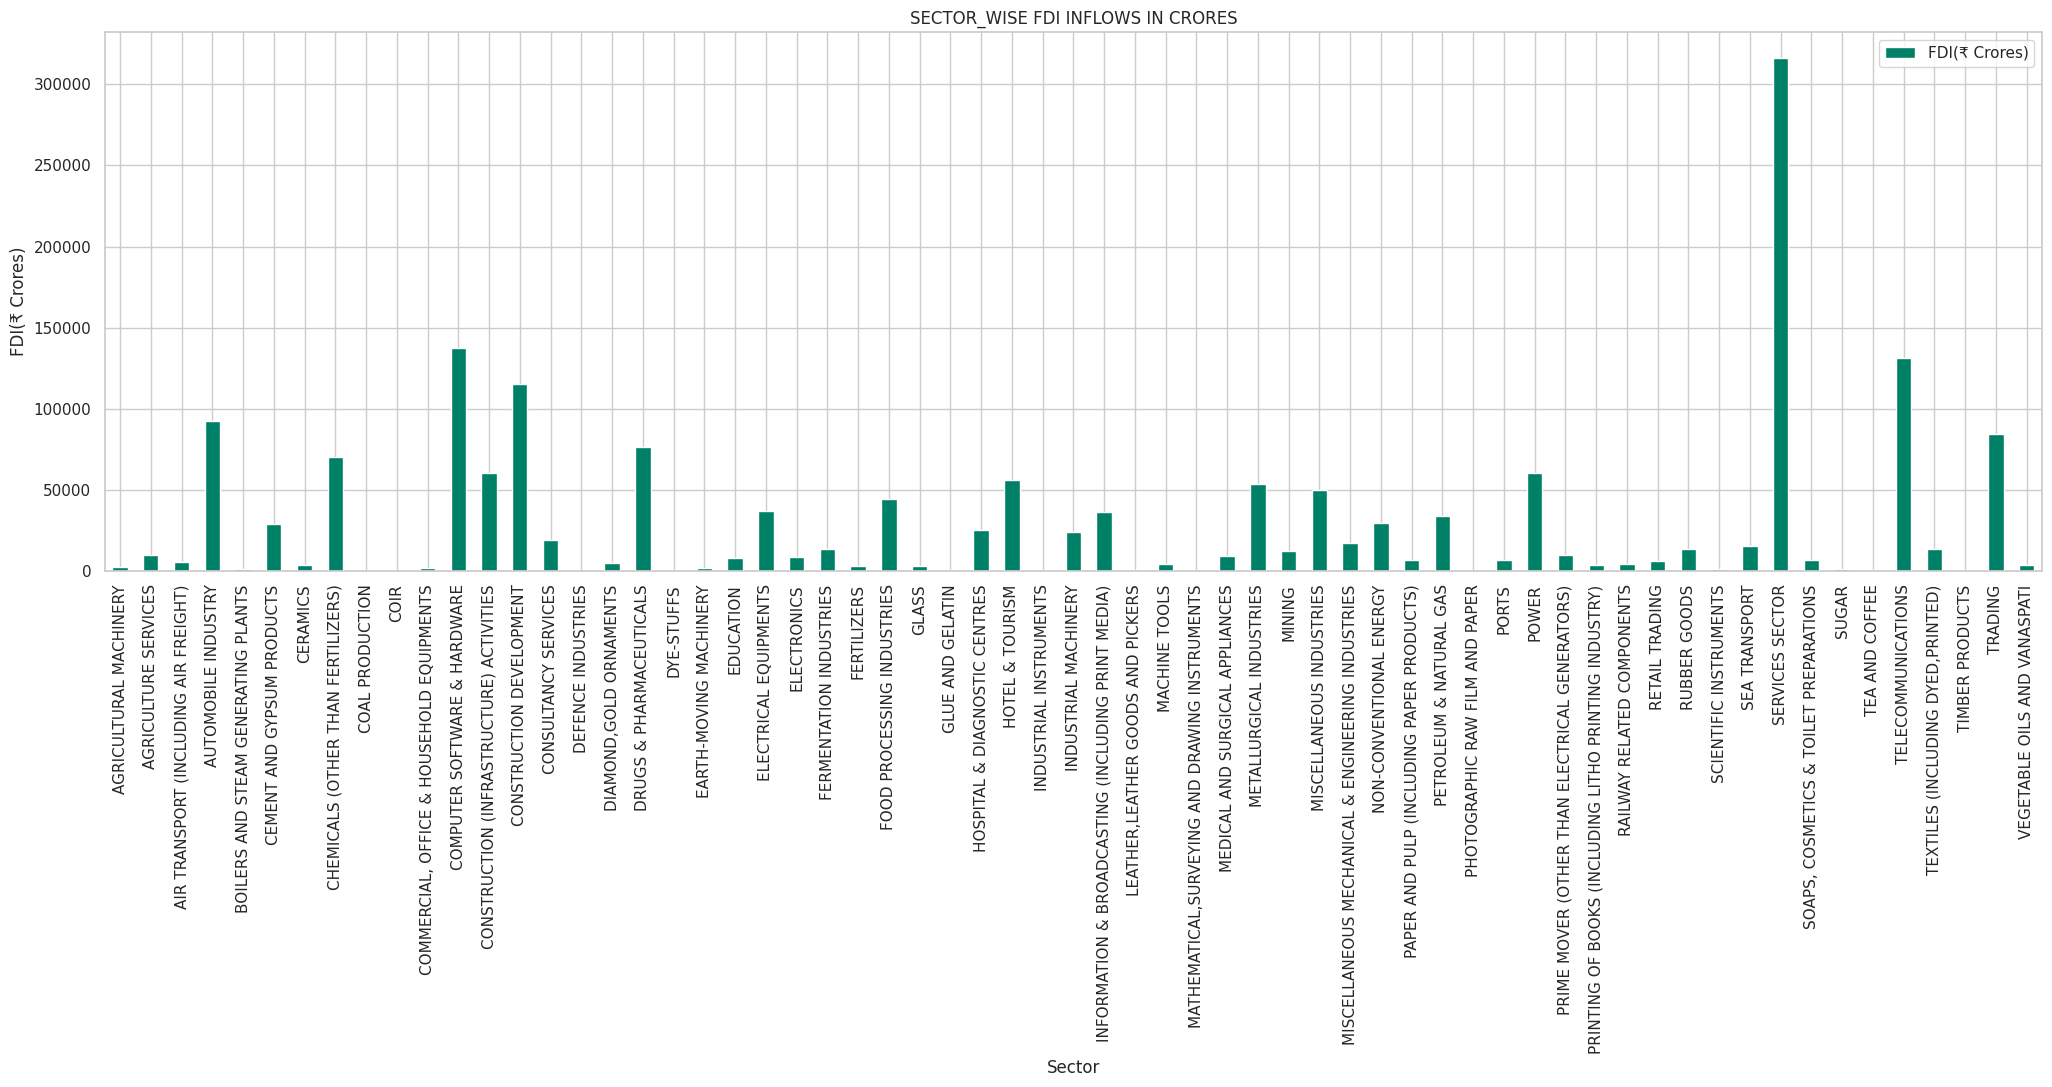

In [ ]:
Sectorwise_fdi.plot(kind='bar',y='FDI(₹ Crores)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS IN CRORES',ylabel='FDI(₹ Crores)',cmap='summer')
plt.show()

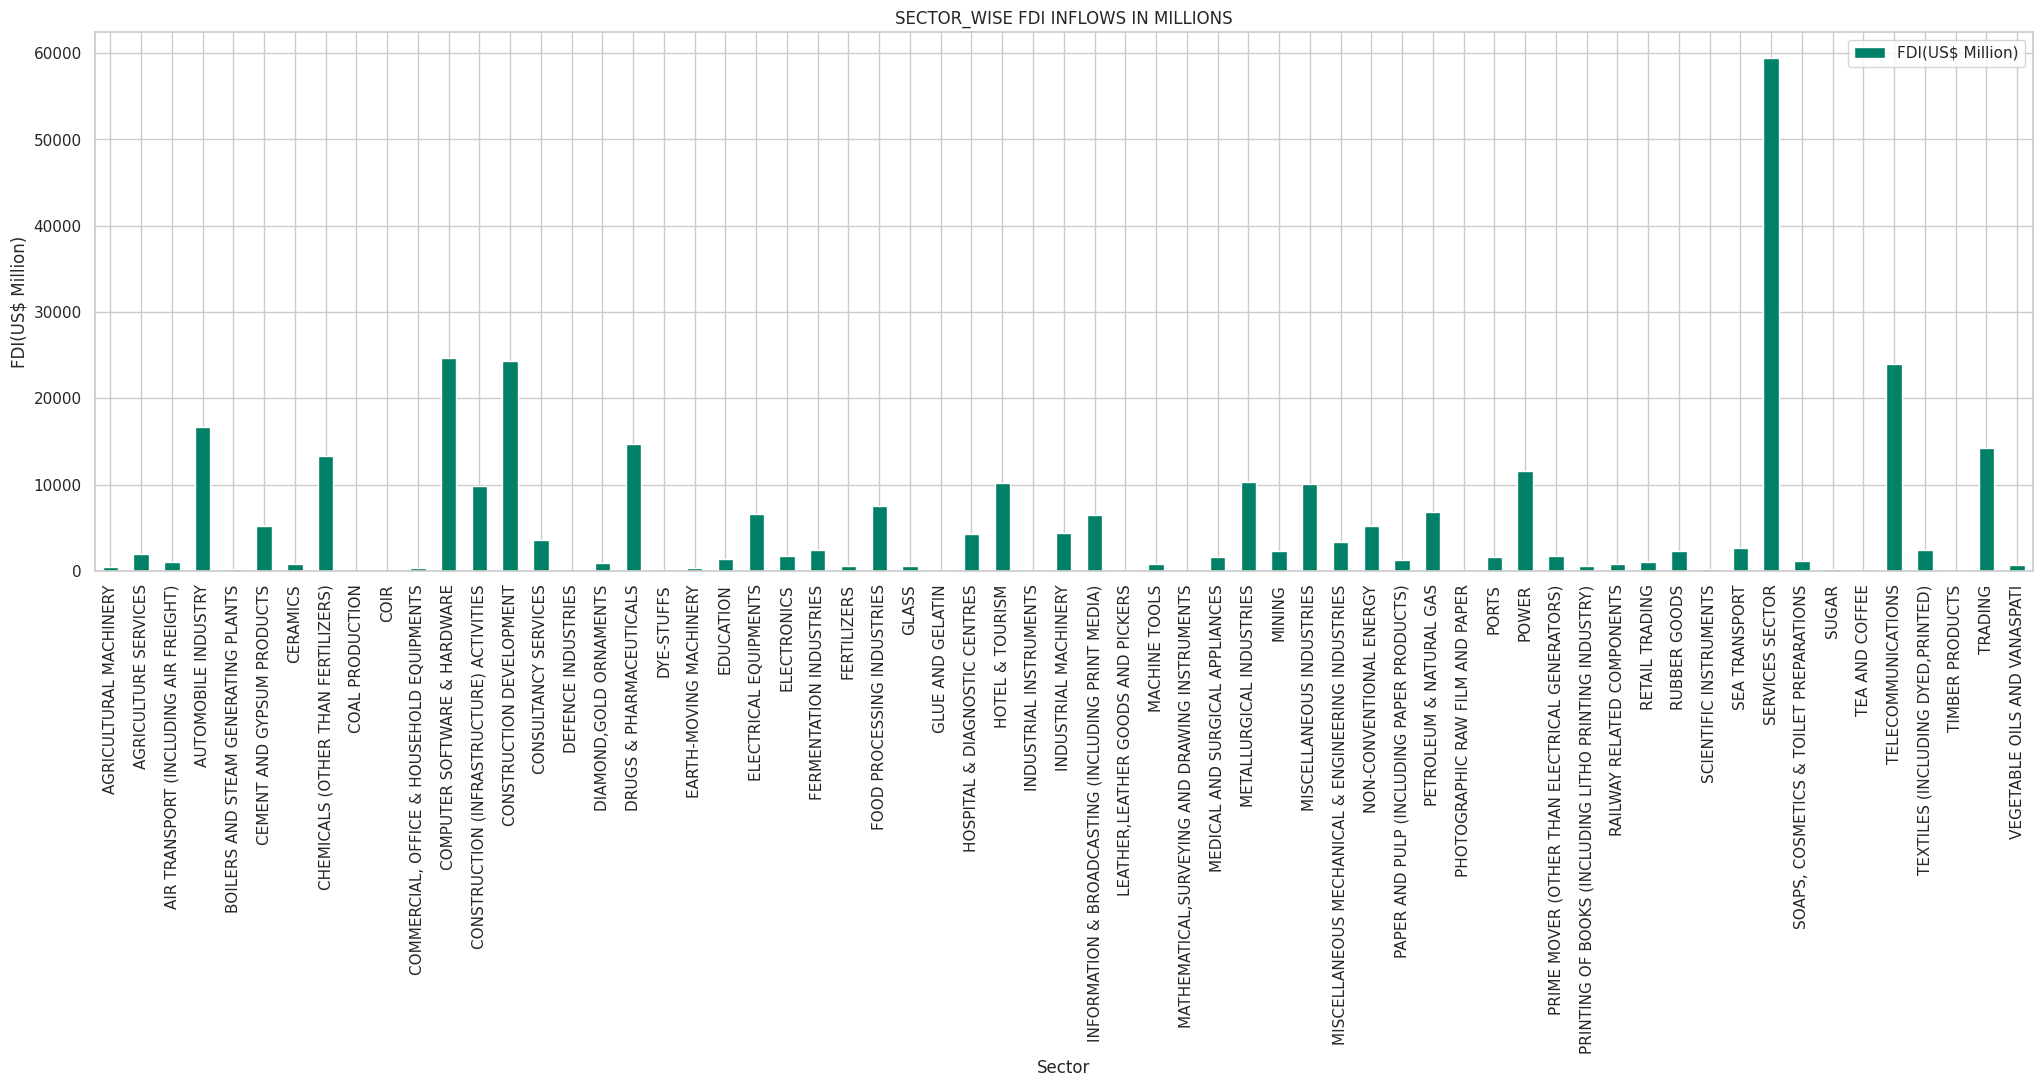

In [ ]:
Sectorwise_fdi.plot(kind='bar',y='FDI(US$ Million)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS IN MILLIONS' ,ylabel='FDI(US$ Million)',cmap='summer')
plt.show()

In [ ]:
#Top 10 Sectors
Top_10_Sectors = Sectorwise_fdi.nlargest(10,['FDI(₹ Crores)'])

In [ ]:
#Calculating percentage-wise FDI share among top 10 sectors and among all sectors
Total_fdi = round(melt01['FDI(₹ Crores)'].sum(),2)
Sum = Top_10_Sectors['FDI(₹ Crores)'].sum()
Top_10_Sectors['In %age'] = round(Top_10_Sectors['FDI(₹ Crores)']/Sum*100,2)
Top_10_Sectors['%age to Total Inflows'] = round((Top_10_Sectors['FDI(₹ Crores)']/Total_fdi)*100,2)
Top_10_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
SERVICES SECTOR,316426.67,59476.49,27.66,17.65
COMPUTER SOFTWARE & HARDWARE,137296.48,24669.49,12.00,7.66
TELECOMMUNICATIONS,131001.76,23946.01,11.45,7.31
CONSTRUCTION DEVELOPMENT,115217.43,24293.09,10.07,6.43
AUTOMOBILE INDUSTRY,92637.98,16673.92,8.10,5.17
TRADING,84502.09,14210.88,7.39,4.71
DRUGS & PHARMACEUTICALS,76411.49,14706.90,6.68,4.26
CHEMICALS (OTHER THAN FERTILIZERS),70068.76,13293.09,6.12,3.91
POWER,60416.03,11589.13,5.28,3.37


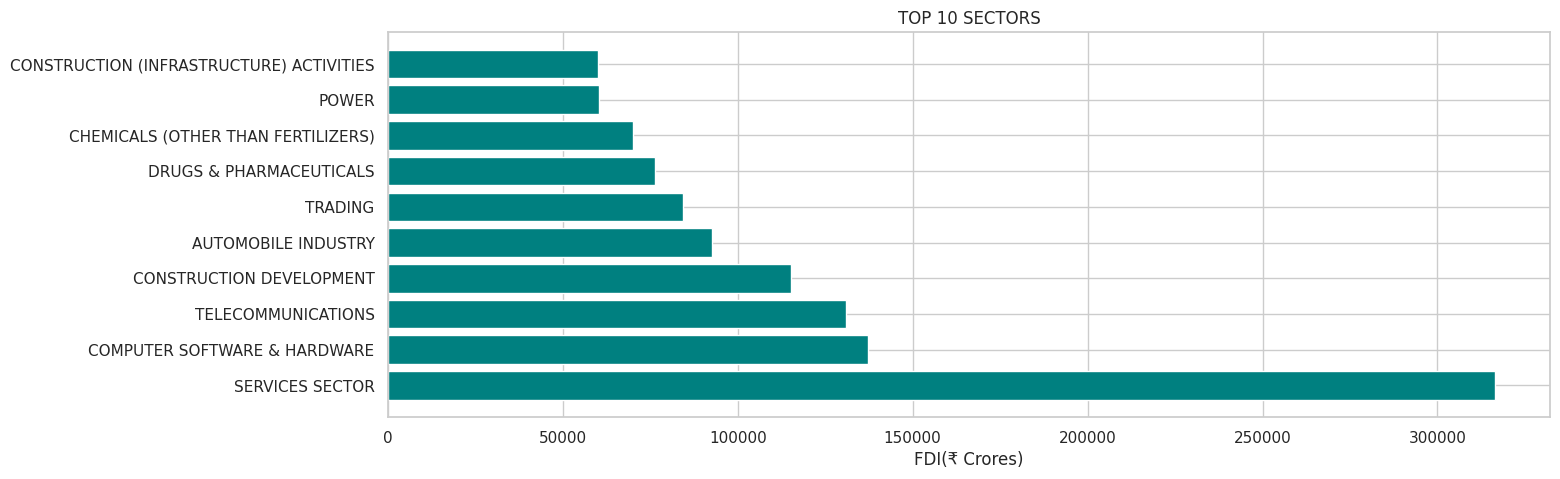

In [ ]:
plt.figure(figsize=(15,5))
plt.barh(Top_10_Sectors.index,Top_10_Sectors['FDI(₹ Crores)'],color='Teal')
plt.title('TOP 10 SECTORS')
plt.xlabel('FDI(₹ Crores)')
plt.show()

In [ ]:
#Calculating Bottom Sectors
Bottom_5_Sectors = Sectorwise_fdi.nsmallest(5,['FDI(₹ Crores)'])
Sum = Bottom_5_Sectors['FDI(₹ Crores)'].sum()
Bottom_5_Sectors['In %age'] = round(Bottom_5_Sectors['FDI(₹ Crores)']/Sum*100,2)
Bottom_5_Sectors['%age to Total Inflows'] = round((Bottom_5_Sectors['FDI(₹ Crores)']/Total_fdi)*100,3)
Bottom_5_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
COIR,21.64,4.06,4.42,0.001
DEFENCE INDUSTRIES,26.12,5.12,5.33,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.62,7.98,8.50,0.002
COAL PRODUCTION,122.13,27.74,24.93,0.007
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28,56.82,0.016


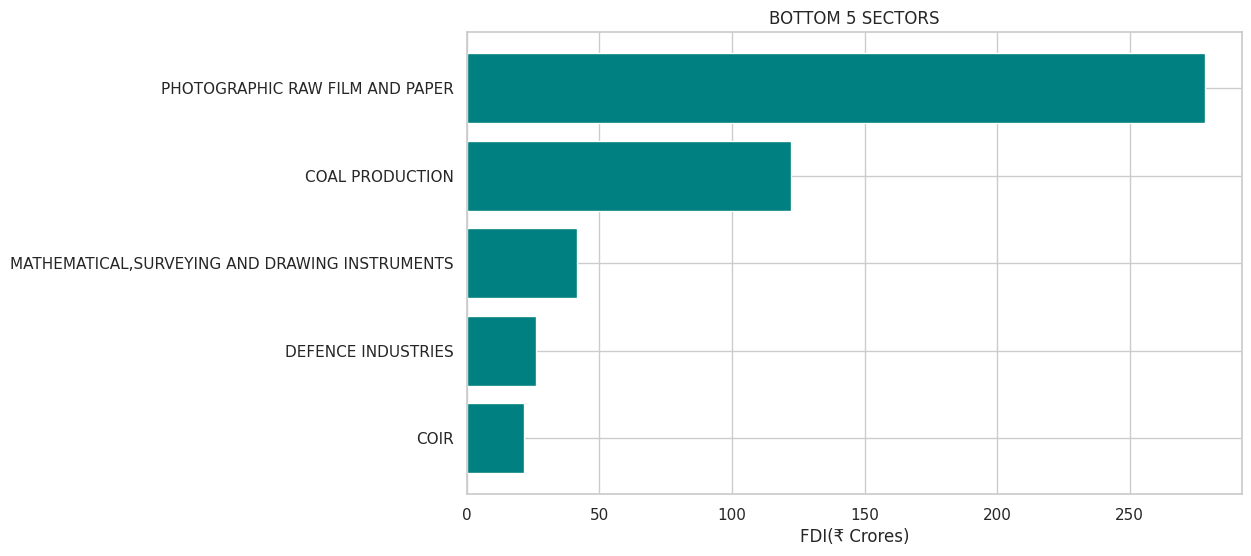

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(Bottom_5_Sectors.index,Bottom_5_Sectors['FDI(₹ Crores)'],color = 'Teal')
plt.title('BOTTOM 5 SECTORS')
plt.xlabel('FDI(₹ Crores)')
plt.show()

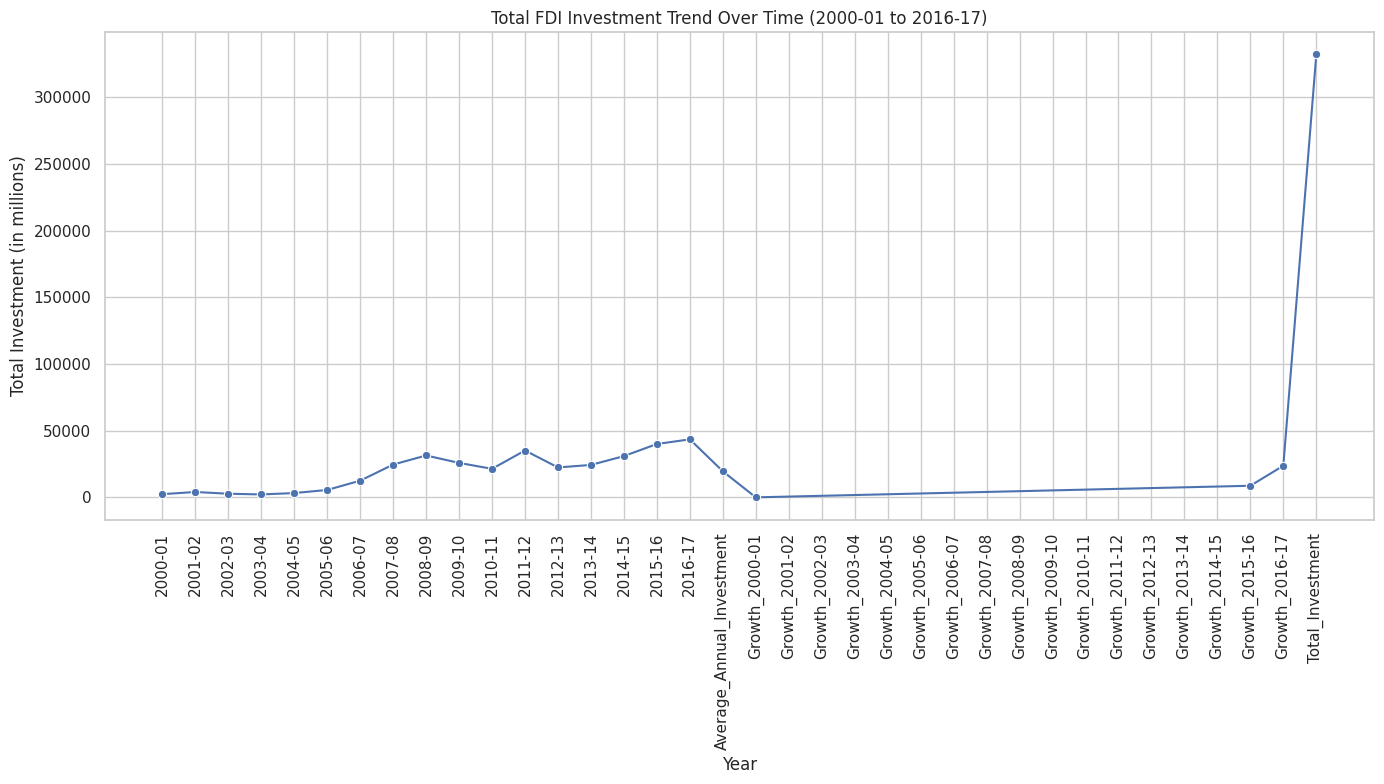

In [ ]:
fdi_long = fdi_data.melt(id_vars='Sector', var_name='Year', value_name='Investment')
fdi_long['Year'] = fdi_long['Year'].astype('category')
sns.set(style='whitegrid')
total_investment_per_year = fdi_long.groupby('Year')['Investment'].sum().reset_index()

# Plot total investment trend over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Investment', data=total_investment_per_year, marker='o')
plt.title('Total FDI Investment Trend Over Time (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('Total Investment (in millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

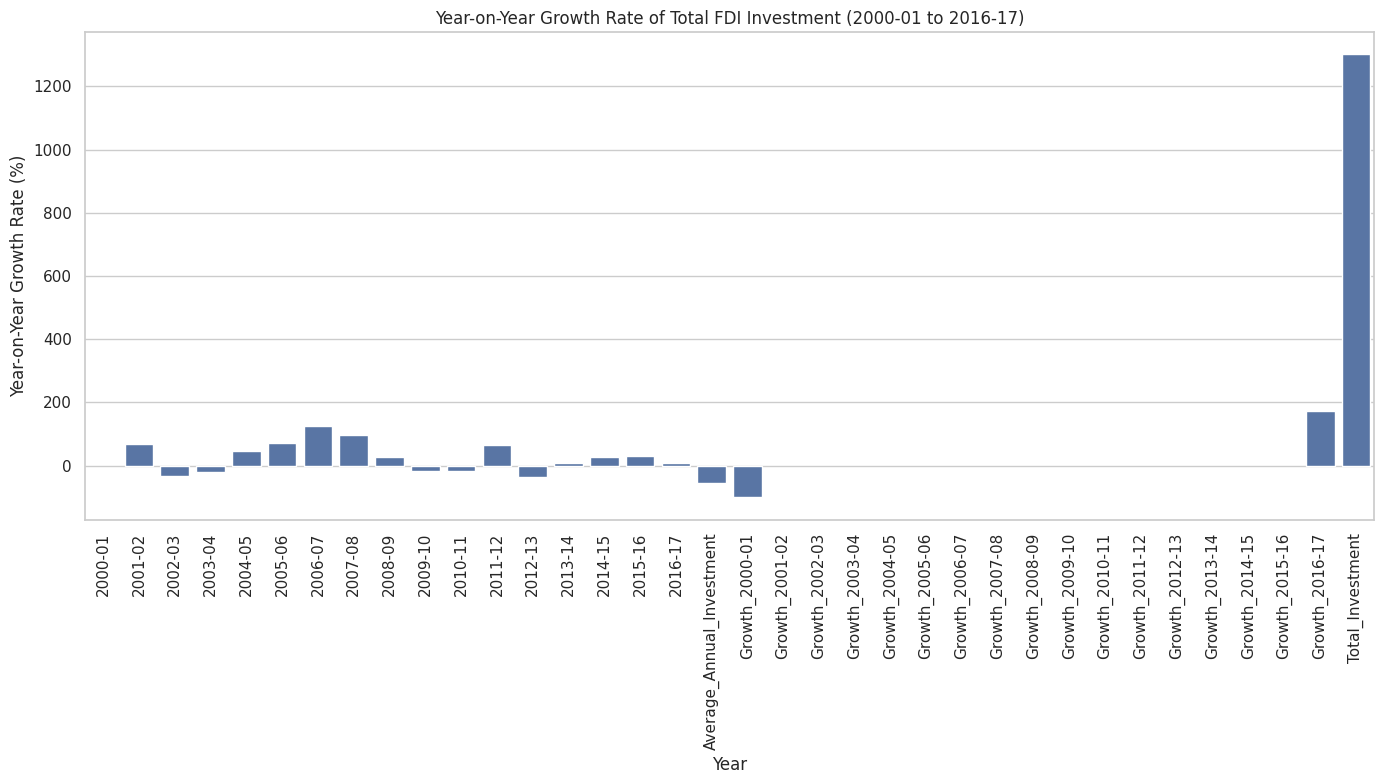

In [ ]:
# Calculate year-on-year growth rate for total investment
total_investment_per_year['Investment'] = total_investment_per_year['Investment'].astype(float)
total_investment_per_year['YoY_Growth'] = total_investment_per_year['Investment'].pct_change() * 100

# Plot year-on-year growth rate
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='YoY_Growth', data=total_investment_per_year)
plt.title('Year-on-Year Growth Rate of Total FDI Investment (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('Year-on-Year Growth Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()